In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gender = pd.read_csv("occupations_with_names_gender.csv")
race = pd.read_csv("occupations_with_names_race.csv")

gender["Median Annual Wage"] = gender["Median Annual Wage"].replace("May", np.nan).astype(float)
race["Median Annual Wage"] = race["Median Annual Wage"].replace("May", np.nan).astype(float)

In [3]:
gender["name"].unique()

array(['James', 'Mary', 'Micheal', 'Patricia', 'John', 'Jennifer',
       'Robert', 'Linda', 'David', 'Elizabeth', 'William', 'Barbara'],
      dtype=object)

Text(0.5, 1.0, 'Boxplot of Median Annual Wage by Gender')

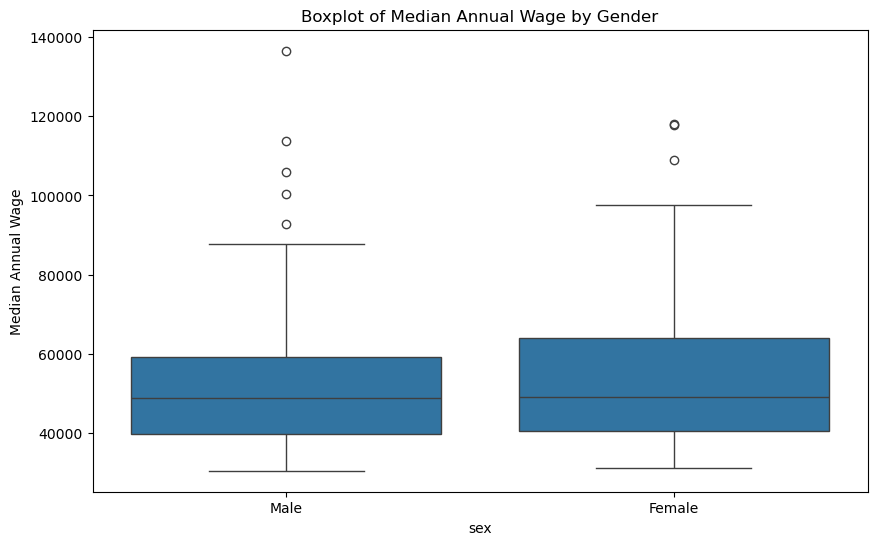

In [4]:
name2sex = {
    'James': "Male", 
    'Patricia': "Female", 
    'John': "Male", 
    'Robert': "Male", 
    'William': "Male", 
    'Jennifer': "Female",
    'David': "Male", 
    'Michael': "Male", 
    'Linda': "Female", 
    'Barbara': "Female", 
    'Elizabeth': "Female", 
    'Mary': "Female",
    'Micheal': "Male"
    
    
}
gender["sex"] = gender["name"].map(name2sex)

# make boxplot of median annual wage
plt.figure(figsize=(10, 6))
sns.boxplot(data = gender, x = "sex", y = "Median Annual Wage")
plt.title("Boxplot of Median Annual Wage by Gender")

In [88]:
race["name"].unique()

array(['James', 'Ali', 'Wei', 'Kwame', 'Micheal', 'Mehmet', 'Jian',
       'Jabri', 'John', 'Burak', 'Feng', 'Omari'], dtype=object)

Text(0.5, 1.0, 'Boxplot of Median Annual Wage by Race')

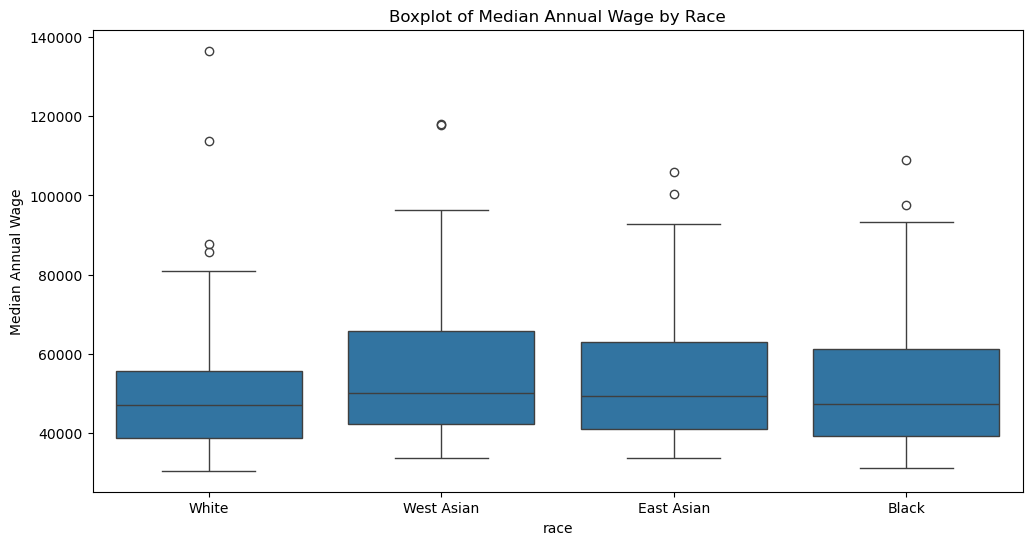

In [5]:
name2race = {
    'James': "White", 
    'Ali': "West Asian", 
    'Wei': "East Asian", 
    'Kwame': "Black", 
    'Micheal': "White", 
    'Mehmet': "West Asian", 
    'Jian': "East Asian",
    'Jabri': "Black", 
    'John': "White", 
    'Burak': "West Asian", 
    'Feng': "East Asian", 
    'Omari': "Black"
}
race["race"] = race["name"].map(name2race)

plt.figure(figsize=(12, 6))
sns.boxplot(data = race, x = 'race', y = 'Median Annual Wage')
plt.title('Boxplot of Median Annual Wage by Race')

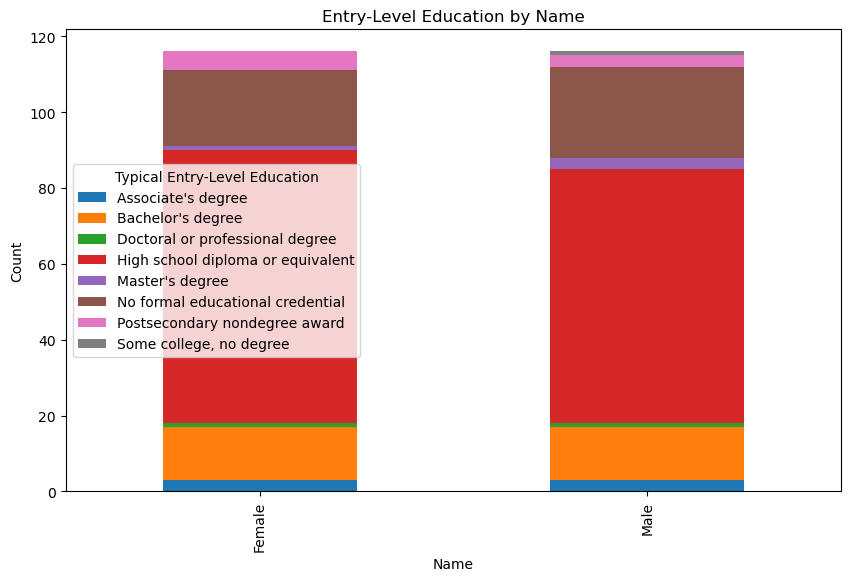

In [13]:
gender_edu = gender.groupby(['sex', 'Typical Entry-Level Education']).size().reset_index(name='count')


gender_edu_pivot = gender_edu.pivot(index='sex', columns='Typical Entry-Level Education', values='count')

# Fill missing values with 0
gender_edu_pivot = gender_edu_pivot.fillna(0)

# Create a stacked bar chart
gender_edu_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Entry-Level Education by Name')
plt.xlabel('Name')
plt.ylabel('Count')

# Show the plot
plt.show()

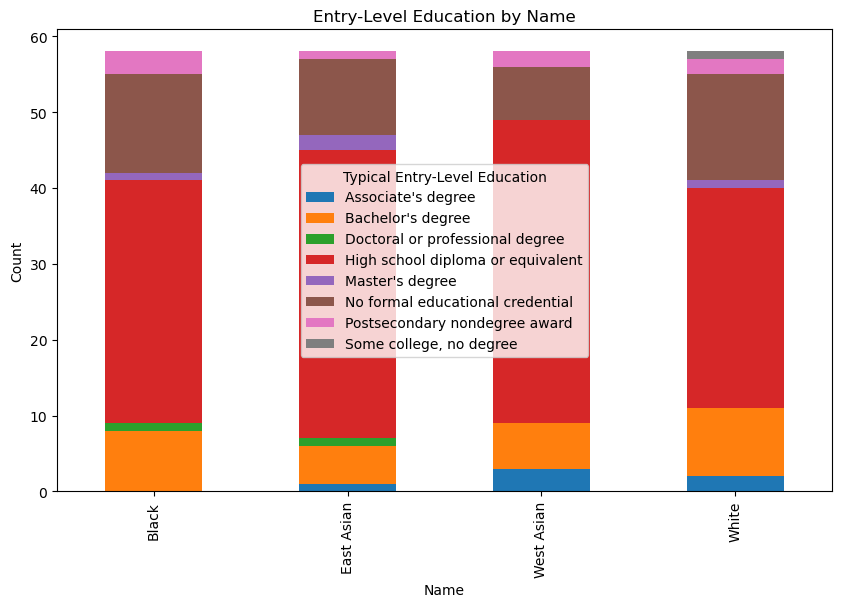

In [14]:
race_edu = race.groupby(['race', 'Typical Entry-Level Education']).size().reset_index(name='count')


race_edu_pivot = race_edu.pivot(index='race', columns='Typical Entry-Level Education', values='count')

# Fill missing values with 0
race_edu_pivot = race_edu_pivot.fillna(0)

# Create a stacked bar chart
race_edu_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Entry-Level Education by Name')
plt.xlabel('Name')
plt.ylabel('Count')

# Show the plot
plt.show()

In [6]:
edu2num = {
    'No formal educational credential': 1,
    'High school diploma or equivalent': 2,
    'Postsecondary nondegree award': 3,
    'Some college, no degree': 4,
    "Associate's degree": 5,
    "Bachelor's degree": 6,
    "Master's degree": 7,
    'Doctoral or professional degree': 8
}

race["Numeric Education"] = race["Typical Entry-Level Education"].map(edu2num)
gender["Numeric Education"] = gender["Typical Entry-Level Education"].map(edu2num)

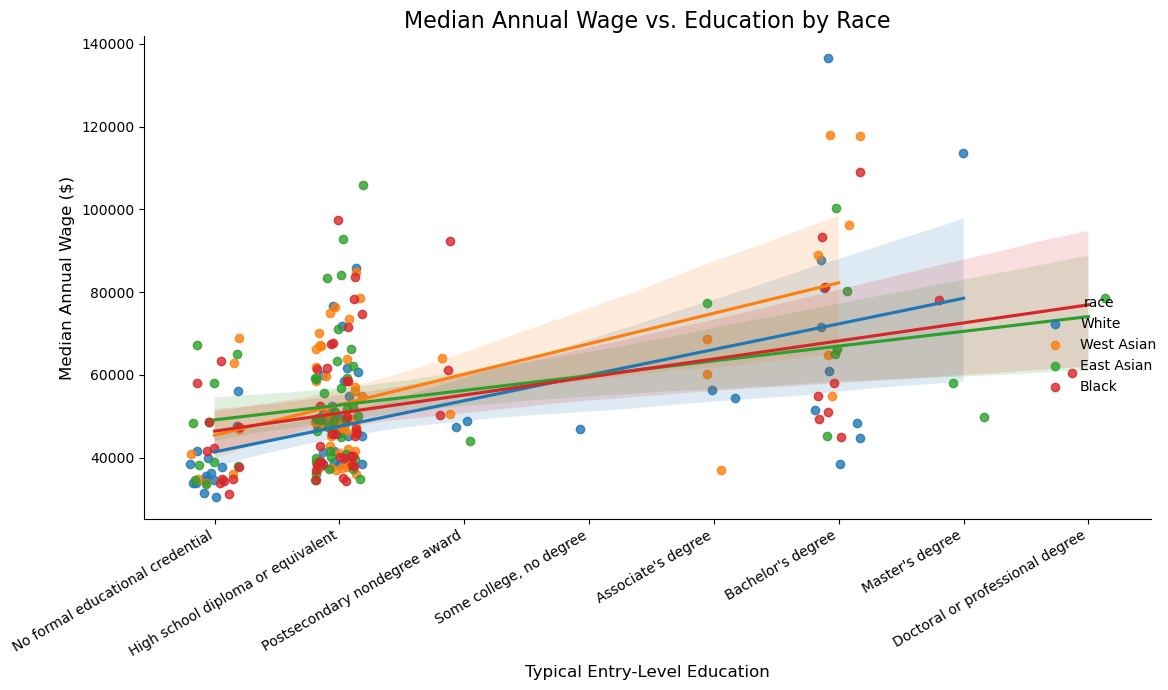

In [26]:
sns.lmplot(
    data=race,
    x='Numeric Education',        
    y='Median Annual Wage',            
    hue='race',                             
    x_jitter=0.2,                           
    height=7,                               
    aspect=1.5,                          
)


plt.title('Median Annual Wage vs. Education by Race', fontsize=16)
plt.xlabel('Typical Entry-Level Education', fontsize=12)
plt.ylabel('Median Annual Wage ($)', fontsize=12)

plt.xticks(
    ticks=list(edu2num.values()),
    labels=list(edu2num.keys()),
    rotation=30,
    ha='right'
)

plt.tight_layout()
plt.savefig("wage_vs_education_by_race.png")
plt.show()

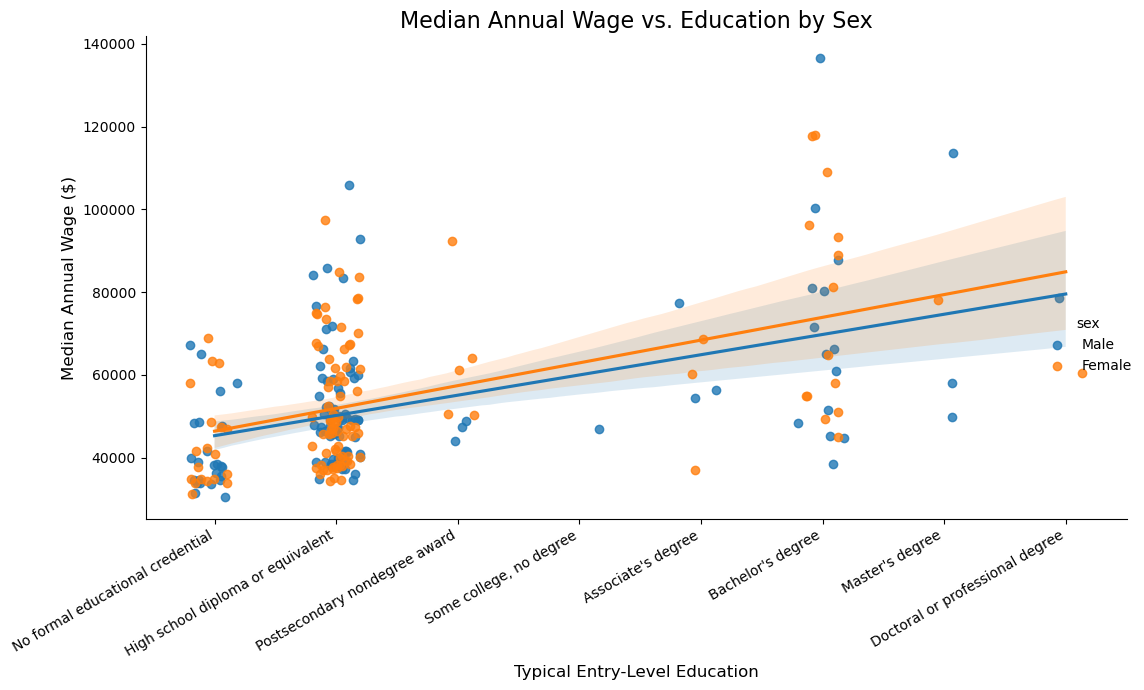

In [27]:
sns.lmplot(
    data=gender,
    x='Numeric Education',                  
    y='Median Annual Wage',                 
    hue='sex',                             
    x_jitter=0.2,                           
    height=7,                               
    aspect=1.5,                                                           
)


plt.title('Median Annual Wage vs. Education by Sex', fontsize=16)
plt.xlabel('Typical Entry-Level Education', fontsize=12)
plt.ylabel('Median Annual Wage ($)', fontsize=12)


plt.xticks(
    ticks=list(edu2num.values()),
    labels=list(edu2num.keys()),
    rotation=30,
    ha='right') 

plt.tight_layout()
plt.savefig("wage_vs_education_by_sex.png")
plt.show()

In [40]:
gender[gender["Typical Entry-Level Education"] == "Doctoral or professional degree"]["occupation"].unique()

array(['Judicial law clerks', 'Postsecondary teachers, all other'],
      dtype=object)

In [42]:
occupation_stem_classification = {
    'Legislators': 'non-STEM',
    'Education administrators, all other': 'non-STEM',
    'Managers, all other': 'non-STEM',
    'Agents and business managers of artists, performers, and athletes': 'non-STEM',
    'Business operations specialists, all other': 'non-STEM',
    'Credit analysts': 'non-STEM',
    'Financial specialists, all other': 'non-STEM',
    'Computer occupations, all other': 'STEM',
    'Mathematical science occupations, all other': 'STEM',
    'Engineers, all other': 'STEM',
    'Biological scientists, all other': 'STEM',
    'Life scientists, all other': 'STEM',
    'Physical scientists, all other': 'STEM',
    'Social scientists and related workers, all other': 'non-STEM',
    'Social science research assistants': 'non-STEM',
    'Community and social service specialists, all other': 'non-STEM',
    'Clergy': 'non-STEM',
    'Directors, religious activities and education': 'non-STEM',
    'Religious workers, all other': 'non-STEM',
    'Substitute teachers, short-term': 'non-STEM',
    'Teachers and instructors, all other': 'non-STEM',
    'Teaching assistants, postsecondary': 'non-STEM',
    'Educational instruction and library workers, all other': 'non-STEM',
    'Designers, all other': 'non-STEM',
    'Therapists, all other': 'STEM',
    'Proofreaders and copy markers': 'non-STEM',
    'Statistical assistants': 'STEM',
    'Agricultural inspectors': 'STEM',
    'Counselors, all other': "non-STEM", 
    'Farm and home management educators': "non-STEM",
    'Acupuncturists': "STEM",
    'Healthcare diagnosing or treating practitioners, all other': "STEM",
    'Judicial law clerks': "non-STEM", 
    'Postsecondary teachers, all other': "non-STEM",
}

gender_upper = gender[(gender["Typical Entry-Level Education"] == "Doctoral or professional degree")|(gender["Typical Entry-Level Education"] == "Master's degree")|(gender["Typical Entry-Level Education"] == "Bachelor's degree")]
race_upper = race[(race["Typical Entry-Level Education"] == "Doctoral or professional degree")|(race["Typical Entry-Level Education"] == "Master's degree")|(race["Typical Entry-Level Education"] == "Bachelor's degree")]

gender_upper["occupation_classification"] = gender_upper["occupation"].map(occupation_stem_classification)
race_upper["occupation_classification"] = race_upper["occupation"].map(occupation_stem_classification)

/var/folders/jb/b4wvvt9948bgtf9ccsyfxvlc0000gn/T/ipykernel_50448/31176214.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_upper["occupation_classification"] = gender_upper["occupation"].map(occupation_stem_classification)
/var/folders/jb/b4wvvt9948bgtf9ccsyfxvlc0000gn/T/ipykernel_50448/31176214.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_upper["occupation_classification"] = race_upper["occupation"].map(occupation_stem_classification)


In [52]:
gender_upper.groupby(["occupation_classification","sex"])[["occupation"]].count()

occupation
occupation_classification sex               
STEM                      Female           6
                          Male             5
non-STEM                  Female          10
                          Male            13

In [51]:
race_upper.groupby(["occupation_classification","race"])[["occupation"]].count()

occupation
occupation_classification race                  
STEM                      Black                4
                          East Asian           1
                          West Asian           2
                          White                4
non-STEM                  Black                6
                          East Asian           7
                          West Asian           4
                          White                6